# How does the Proportion of Women in Parliament Affect the Country's Military Expenditure? | Appendix


### Authors:
- [Anna Dovha](https://www.linkedin.com/in/anna-dovha-28b178218/)
- [Guillaume Chapalain](linkedin.com/in/guillaume-chapalain)
- [Maxime Sperandio](https://www.linkedin.com/in/maxime-sperandio-b30339269/)


# Upload the packages

In [1]:
# Install required packages
!pip install seaborn==0.10.0
!pip install numpy >= 1.13
!pip install -U linearmodels
!pip install -U stargazer
!pip install -U statsmodels
!pip install uvicorn
!pip install PtitPrince
!pip install graphviz

# Import packages
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels.iv import IV2SLS
import pandas as pd
import numpy as np
import datetime
from collections.abc import Sequence
import plotly.express as px
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer
import seaborn as sns
import ptitprince as pt
from ptitprince import RainCloud
from scipy.stats import skew
import graphviz as gr




[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached seaborn-0.11.0-py3-none-any.whl (283 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# SEABORN THEME
scale = 0.4
W = 16*scale
H = 9*scale
sns.set(rc = {'figure.figsize':(W,H)})
sns.set_style("white")

# Data cleaning

### Getting the data

In [3]:
!pip install wbdata


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import wbdata

In [5]:
url = "https://raw.githubusercontent.com/edoardochiarotti/class_datascience/main/2023/02_Data-Cleaning/data/polity2_iso3.csv"
polity = pd.read_csv(url)

C:\Users\dovga\AppData\Local\Temp\ipykernel_16996\2330658419.py:2: DtypeWarning: Columns (13,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  polity = pd.read_csv(url)


In [6]:
democracy = polity.loc[:, ['country', 'year', 'polity2']]
democracy = democracy.rename(columns={'polity2': 'democracy'})
print(democracy)

            country  year  democracy
0      Wuerttemburg  1800       -7.0
1             Korea  1800        1.0
2           Bavaria  1800      -10.0
3             Korea  1801        1.0
4      Wuerttemburg  1801       -7.0
...             ...   ...        ...
17569      Zimbabwe  2014        4.0
17570      Zimbabwe  2015        4.0
17571      Zimbabwe  2016        4.0
17572      Zimbabwe  2017        4.0
17573      Zimbabwe  2018        4.0

[17574 rows x 3 columns]


In [7]:
democracy['country'] = democracy['country'].str.strip()

In [8]:
print(wbdata.get_indicator(source=29))

id                              name
------------------------------  ---------------------------------------------------------------------------------------------------------
per_allsp.adq_ep_preT_tot       Adequacy of benefits in extreme poor (<$1.9 a day) (%) -All Social Protection and Labor  (preT)
per_allsp.adq_ep_tot            Adequacy of benefits in extreme poor (<$1.9 a day) (%) -All Social Protection and Labor
per_allsp.adq_pop_preT_tot      Adequacy of benefits (%) -All Social Protection and Labor (preT)
per_allsp.adq_pop_rur           Adequacy of benefits (%) -All Social Protection and Labor -rural
per_allsp.adq_pop_tot           Adequacy of social protection and labor programs (% of total welfare of beneficiary households)
per_allsp.adq_pop_urb           Adequacy of benefits (%) -All Social Protection and Labor -urban
per_allsp.adq_q1_preT_tot       Adequacy of benefits in 1st quintile (poorest) (%) -All Social Protection and Labor (preT)
per_allsp.adq_q1_rur            Ade

The World Bank classifies economies into four income categories:

- Low Income (LIC)
- Lower Middle Income (LMC)
- Upper Middle Income (UMC)
- High Income (HIC)

In [9]:
hic_countries = [i['id'] for i in wbdata.get_country(incomelevel='HIC')]
umc_countries = [i['id'] for i in wbdata.get_country(incomelevel='UMC')]
lmc_countries = [i['id'] for i in wbdata.get_country(incomelevel='LMC')]
lic_countries = [i['id'] for i in wbdata.get_country(incomelevel='LIC')]


In [10]:
print(lmc_countries)

['AGO', 'BEN', 'BGD', 'BOL', 'BTN', 'CIV', 'CMR', 'COG', 'COM', 'CPV', 'DJI', 'DZA', 'EGY', 'FSM', 'GHA', 'GIN', 'HND', 'HTI', 'IND', 'IRN', 'JOR', 'KEN', 'KGZ', 'KHM', 'KIR', 'LAO', 'LBN', 'LKA', 'LSO', 'MAR', 'MMR', 'MNG', 'MRT', 'NGA', 'NIC', 'NPL', 'PAK', 'PHL', 'PNG', 'SEN', 'SLB', 'STP', 'SWZ', 'TJK', 'TLS', 'TUN', 'TZA', 'UKR', 'UZB', 'VNM', 'VUT', 'WSM', 'ZMB', 'ZWE']


### Selecting indicators which are the key elements of our model

In [11]:
indicators = {
    'MS.MIL.XPND.GD.ZS': 'mil_expenditure', # Military expenditure (% of GDP)
    'MS.MIL.XPND.CD': 'mil_expenditure_usd', # Military expenditure (current USD)
    'SP.POP.TOTL': 'population', #Population, total
    'SG.GEN.PARL.ZS': 'women_parl', # Proportion of seats held by women in national parliaments (%)
    #'SG.GEN.MNST.ZS': 'women_mnst', #	Proportion of women in ministerial level positions (%)
    #'NY.GDP.MKTP.KD.ZG': 'gdp_growth', # GDP growth (annual %)
    'NY.GDP.PCAP.CD':'gdp_capita', #GDP per capita (current US$)
    #'NY.GDP.MKTP.CD':'gdp_usd', #GDP (current US$)
    #'SE.XPD.TOTL.GD.ZS': 'education', #Government expenditure on education, total (% of GDP)
    'PV.EST': 'stability', #Political Stability and Absence of Violence/Terrorism: Estimate
    #'SH.PTR.LEVE': 'parental_leave',
    'SG.LAW.INDX': 'law_business', #Women Business and the Law Index Score (scale 1-100)
}

In [12]:
df_hic = wbdata.get_dataframe(indicators, country=hic_countries, convert_date=True)
df_umc = wbdata.get_dataframe(indicators, country=umc_countries, convert_date=True)
df_lmc = wbdata.get_dataframe(indicators, country=lmc_countries, convert_date=True)
df_lic = wbdata.get_dataframe(indicators, country=lic_countries, convert_date=True)

JSONDecodeError: Expecting value: line 2 column 9 (char 9)

In [ ]:
df_hic.loc["Canada"]

,mil_expenditure,mil_expenditure_usd,population,women_parl,gdp_capita,stability,law_business
date,,,,,,,
2022-01-01,1.236656,2.689632e+10,38929902.0,30.473373,54917.662523,0.772814,100.0
2021-01-01,1.267294,2.536224e+10,38226498.0,30.473373,52358.621641,0.962196,100.0
2020-01-01,1.400836,2.308277e+10,38007166.0,28.994083,43349.677856,1.013105,100.0
2019-01-01,1.284512,2.239488e+10,37601230.0,28.994083,46374.152752,0.994818,100.0
2018-01-01,1.317678,2.272933e+10,37065084.0,26.946108,46548.638411,0.963774,97.5
...,...,...,...,...,...,...,...
1964-01-01,3.402063,1.657457e+09,19325000.0,NaN,2555.111146,NaN,NaN
1963-01-01,3.620650,1.610092e+09,18964000.0,NaN,2374.498448,NaN,NaN
1962-01-01,3.999216,1.671314e+09,18614000.0,NaN,2268.585346,NaN,NaN


In [ ]:
#we want to make "country" into the column and not just index to merge with polity dataset, also I am changing the "date" into "year"

def process_worldbank_df(df):
    if not isinstance(df.index, pd.RangeIndex):
        df = df.reset_index()
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df.drop(columns=['date'], inplace=True)
    return df


df_hic = process_worldbank_df(df_hic)
df_umc = process_worldbank_df(df_umc)
df_lmc = process_worldbank_df(df_lmc)
df_lic = process_worldbank_df(df_lic)


In [ ]:
#in the polity5 the names are not always matching with the once in the world bank

country_mapping = {
    'Russia': 'Russian Federation',
    'Korea': 'Korea, Rep.',
    'USSR': 'Russian Federation',
    'Pakistan': 'Pakistan',
    'South Vietnam': 'Vietnam',
    'Yemen South': 'Yemen, Rep.',
    'Vietnam': 'Vietnam',
    'Yugoslavia': 'Serbia',
    'Serbia and Montenegro': 'Serbia',
    'Sudan-North': 'Sudan',
    'Bosnia': 'Bosnia and Herzegovina',
    'Czech Republic': 'Czechia',
    'Prussia': 'Germany',
    'Congo Kinshasa': 'Congo, Dem. Rep.',
    'Congo-Brazzaville': 'Congo, Rep.',
    'Congo Brazzaville': 'Congo, Rep.',
    'Ivory Coast': "Cote D'Ivoire",
    'Korea South': 'Korea, Rep.',
    'Macedonia': 'North Macedonia',
    'Myanmar (Burma)': 'Myanmar',
    'Korea North': 'Korea, Dem. People\'s Rep.',
    'Turkiye': 'Turkey',
    'United States': 'United States'
}

democracy['country'] = democracy['country'].replace(country_mapping)

In [ ]:
df_hic = pd.merge(democracy, df_hic, on=['country', 'year'], how='inner')
df_umc = pd.merge(democracy, df_umc, on=['country', 'year'], how='inner')
df_lmc = pd.merge(democracy, df_lmc, on=['country', 'year'], how='inner')
df_lic = pd.merge(democracy, df_lic, on=['country', 'year'], how='inner')

df_hic.set_index(['country', 'year'], inplace=True)
df_umc.set_index(['country', 'year'], inplace=True)
df_lmc.set_index(['country', 'year'], inplace=True)
df_lic.set_index(['country', 'year'], inplace=True)

Look at the data for a country

In [ ]:
#df_hic.loc["Canada"]

In [ ]:
# Number of unique countries in the HIC dataframe
hic_countries_count = df_hic.index.get_level_values('country').nunique()

# Number of unique countries in the UMC dataframe
umc_countries_count = df_umc.index.get_level_values('country').nunique()

lmc_countries_count = df_lmc.index.get_level_values('country').nunique()

lic_countries_count = df_lic.index.get_level_values('country').nunique()

print(f"Number of unique countries in HIC category: {hic_countries_count}")
print(f"Number of unique countries in UMC category: {umc_countries_count}")
print(f"Number of unique countries in LMC category: {lmc_countries_count}")
print(f"Number of unique countries in LIC category: {lic_countries_count}")

Number of unique countries in HIC category: 46
Number of unique countries in UMC category: 42
Number of unique countries in LMC category: 40
Number of unique countries in LIC category: 24


We are interested to look which counties were included into all the groups depending on the inclome, we will display them in the map

In [ ]:
fig_hic = px.choropleth(df_hic.reset_index(),
                        locations="country",
                        locationmode='country names',
                        color="country",
                        hover_name="country",
                        title="HIC Countries Data")

fig_hic.show()

fig_umc = px.choropleth(df_umc.reset_index(),
                        locations="country",
                        locationmode='country names',
                        color="country",
                        hover_name="country",
                        title="UMC Countries Data")

fig_umc.show()

fig_lmc = px.choropleth(df_lmc.reset_index(),
                        locations="country",
                        locationmode='country names',
                        color="country",
                        hover_name="country",
                        title="LMC Countries Data")

fig_lmc.show()

fig_lic = px.choropleth(df_lic.reset_index(),
                        locations="country",
                        locationmode='country names',
                        color="country",
                        hover_name="country",
                        title="LIC Countries Data")

fig_lic.show()

There are some missing values for both categories of countries. So, our next step will investigating in more details the number missing values per country and deciding which country we would include in the analysis and which period will suit the best

In [ ]:
# Number of missing values for each column per country and year for df_hic
missing_values_hic = df_hic.isnull().groupby(level=['country']).sum()

# For df_umc
missing_values_umc = df_umc.isnull().groupby(level=['country']).sum()

# For df_lmc
missing_values_lmc = df_lmc.isnull().groupby(level=['country']).sum()


#For df_lic

missing_values_lic = df_lic.isnull().groupby(level=['country']).sum()

print("Missing values in HIC category:")
print(missing_values_hic)
print("\nMissing values in UMC category:")
print(missing_values_umc)
print("\nMissing values in LMC category:")
print(missing_values_lmc)
print("\nMissing values in LIC category:")
print(missing_values_lic)

Missing values in HIC category:
                     democracy  mil_expenditure  mil_expenditure_usd  \
country                                                                
Australia                    0                0                    0   
Austria                      0                0                    0   
Bahrain                      0                4                    0   
Belgium                      0                0                    0   
Canada                       0                0                    0   
Chile                        0                0                    0   
Croatia                      0                1                    1   
Cyprus                       0               25                   25   
Czechia                      0                0                    0   
Denmark                      0                0                    0   
Estonia                      0                2                    1   
Finland                      0  

In [ ]:
# Number of missing values for each column per country and year for df_hic
missing_values_hic = df_hic.isnull().groupby(level=['year']).sum()

# For df_umc
missing_values_umc = df_umc.isnull().groupby(level=['year']).sum()

# For df_lmc
missing_values_lmc = df_lmc.isnull().groupby(level=['year']).sum()

# For df_umc
missing_values_lic = df_lic.isnull().groupby(level=['year']).sum()

print("Missing values in HIC category:")
print(missing_values_hic)
print("\nMissing values in UMC category:")
print(missing_values_umc)
print("\nMissing values in LMC category:")
print(missing_values_lmc)
print("\nMissing values in LIC category:")
print(missing_values_umc)

Missing values in HIC category:
      democracy  mil_expenditure  mil_expenditure_usd  population  women_parl  \
year                                                                            
1960          0                8                    4           0          32   
1961          0                8                    4           0          32   
1962          0                9                    5           0          33   
1963          0                9                    6           0          34   
1964          0                9                    6           0          34   
...         ...              ...                  ...         ...         ...   
2016          0                2                    1           0           0   
2017          0                2                    1           0           1   
2018          0                2                    1           0           0   
2019          0                0                    0           0           0

So, as we observe, most countries from both groups began documenting women's participation from 1997 onward. Prior to that, from 1960 to 1997, all the countries in our HIC group dataset lacked these records. For military expenditure and GDP growth, the missing values are more frequent. Similarly, countries in the UMC group follow this trend. Based on this, we can limit our analysis to the years between 1997 and 2018 (polity5 is only available till 2018).

In [ ]:
df_hic = df_hic[(df_hic.index.get_level_values('year') >= 1997) &
               (df_hic.index.get_level_values('year') <= 2018)]
df_umc = df_umc[(df_umc.index.get_level_values('year')>= 1997) &
               (df_umc.index.get_level_values('year') <= 2018)]
df_lmc = df_lmc[(df_lmc.index.get_level_values('year')>= 1997) &
               (df_lmc.index.get_level_values('year') <= 2018)]
df_lic = df_lic[(df_lic.index.get_level_values('year') >= 1997) &
               (df_lic.index.get_level_values('year')<= 2018)]

However, some countries still miss most of the values. We are interested to see which are these countries, let's look at the ones that miss 70% of the values.

In [ ]:
threshold_fraction = 0.7
total_rows = len(df_hic.index.get_level_values('year').unique())

# Identify countries in df_hic with more than 70% missing values in any column
missing_hic = df_hic.isnull().groupby(level='country').sum()
hic_countries_missing= missing_hic[missing_hic.max(axis=1) > threshold_fraction * total_rows].index

# Identify countries in df_umc with more than 70% missing values in any column
missing_umc = df_umc.isnull().groupby(level='country').sum()
umc_countries_missing = missing_umc[missing_umc.max(axis=1) > threshold_fraction * total_rows].index

# Identify countries in df_lmc with more than 70% missing values in any column
missing_lmc = df_lmc.isnull().groupby(level='country').sum()
lmc_countries_missing = missing_lmc[missing_lmc.max(axis=1) > threshold_fraction * total_rows].index

# Identify countries in df_lic with more than 70% missing values in any column
missing_lic = df_lic.isnull().groupby(level='country').sum()
lic_countries_missing = missing_lic[missing_lic.max(axis=1) > threshold_fraction * total_rows].index

print("HIC countries with more than 70% missing values in any column:")
print(hic_countries_missing)
print("\nUMC countries with more than 70% missing values in any column:")
print(umc_countries_missing)
print("\nLMC countries with more than 70% missing values in any column:")
print(lmc_countries_missing)
print("\nLIC countries with more than 70% missing values in any column:")
print(lic_countries_missing)


HIC countries with more than 70% missing values in any column:
Index(['Panama'], dtype='object', name='country')

UMC countries with more than 70% missing values in any column:
Index(['Bosnia and Herzegovina', 'Costa Rica', 'Cuba', 'Suriname',
       'Turkmenistan'],
      dtype='object', name='country')

LMC countries with more than 70% missing values in any column:
Index(['Bhutan', 'Comoros', 'Haiti', 'Solomon Islands'], dtype='object', name='country')

LIC countries with more than 70% missing values in any column:
Index(['Korea, Dem. People's Rep.', 'Somalia'], dtype='object', name='country')


### Data Gaps by Country Income Level

#### High-Income Countries (HIC)
| Country | Descriptive Reasons for Data Gaps |
|---------|-----------------------------------|
| Panama  | Economic shifts, policy changes, data system challenges. |

#### Upper-Middle-Income Countries (UMC)
| Country                | Descriptive Reasons for Data Gaps |
|------------------------|-----------------------------------|
| Bosnia and Herzegovina | Post-conflict recovery, complex political system impacts data gathering. |
| Costa Rica             | Resource constraints, shifting priorities affect data collection. |
| Cuba                   | Political, economic isolation impacts data reliability. |
| Suriname               | Infrastructure issues lead to significant data gaps. |
| Turkmenistan           | Closed political system, limited international engagement. |

#### Lower-Middle-Income Countries (LMC)
| Country       | Descriptive Reasons for Data Gaps |
|---------------|-----------------------------------|
| Bhutan        | Geographical remoteness, unique development philosophy affects data practices. |
| Comoros       | Challenges in robust data collection systems for a small island nation. |
| Haiti         | Economic struggles, political instability are key factors in data gaps. |
| Solomon Islands | Isolation, limited resources hinder comprehensive data collection. |

#### Low-Income Countries (LIC)
| Country              | Descriptive Reasons for Data Gaps |
|----------------------|-----------------------------------|
| Korea, Dem. People's Rep. | Isolation under authoritarian regime limits data availability. |
| Somalia              | Political instability, lack of central governance impacts data collection. |





In [ ]:
# Drop these countries
#df_hic = df_hic.drop(index=hic_countries_to_drop, level='country')
#df_umc = df_umc.drop(index=umc_countries_to_drop, level='country')
#df_lmc = df_lmc.drop(index=lmc_countries_to_drop, level='country')
#df_lic = df_lic.drop(index=lic_countries_to_drop, level='country')

In [ ]:
df_hic_clean = df_hic.dropna()
df_umc_clean = df_umc.dropna()
df_lmc_clean = df_lmc.dropna()
df_lic_clean = df_lic.dropna()

print("Original HIC data shape:", df_hic.shape)
print("Cleaned HIC data shape:", df_hic_clean.shape)

print("Original UMC data shape:", df_umc.shape)
print("Cleaned UMC data shape:", df_umc_clean.shape)

print("Original LMC data shape:", df_lmc.shape)
print("Cleaned LMC data shape:", df_lmc_clean.shape)

print("Original LIC data shape:", df_lic.shape)
print("Cleaned LIC data shape:", df_lic_clean.shape)


Original HIC data shape: (1012, 8)
Cleaned HIC data shape: (822, 8)
Original UMC data shape: (905, 8)
Cleaned UMC data shape: (612, 8)
Original LMC data shape: (880, 8)
Cleaned LMC data shape: (589, 8)
Original LIC data shape: (493, 8)
Cleaned LIC data shape: (305, 8)


In [ ]:
df_hic_clean['mil_exp_cap'] = df_hic_clean['mil_expenditure_usd'] / df_hic_clean['population']
df_umc_clean['mil_exp_cap'] = df_umc_clean['mil_expenditure_usd'] / df_umc_clean['population']
df_lmc_clean['mil_exp_cap'] = df_lmc_clean['mil_expenditure_usd'] / df_lmc_clean['population']
df_lic_clean['mil_exp_cap'] = df_lic_clean['mil_expenditure_usd'] / df_lic_clean['population']

<ipython-input-112-e10f4bb5a282>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-112-e10f4bb5a282>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-112-e10f4bb5a282>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-112-e10

In [ ]:
df_hic_clean['log_mil_exp_cap'] = np.log(df_hic_clean['mil_exp_cap'] +1)
df_umc_clean['log_mil_exp_cap'] =  np.log(df_umc_clean['mil_exp_cap'] + 1)
df_lmc_clean['log_mil_exp_cap'] =  np.log(df_lmc_clean['mil_exp_cap'] + 1)
df_lic_clean['log_mil_exp_cap'] =   np.log(df_lic_clean['mil_exp_cap'] + 1)

<ipython-input-113-dc1541330283>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-113-dc1541330283>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-113-dc1541330283>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-113-dc1

In [ ]:
df_hic_clean

democracy  mil_expenditure  mil_expenditure_usd  \
country       year                                                    
Australia     1998       10.0         1.871122         7.107543e+09   
              2000       10.0         1.829842         7.273760e+09   
              2002       10.0         1.873965         7.946766e+09   
              2003       10.0         1.846290         9.926649e+09   
              2004       10.0         1.827411         1.199522e+10   
...                       ...              ...                  ...   
United States 2014       10.0         3.690961         6.477890e+11   
              2015       10.0         3.481428         6.338296e+11   
              2016        8.0         3.422588         6.398564e+11   
              2017        8.0         3.320541         6.467529e+11   
              2018        8.0         3.323866         6.824914e+11   

                     population  women_parl    gdp_capita  stability  \
country       year                                                     
Australia     1998   18607584.0   15.540541  21479.114202   1.066501   
              2000   19028802.0   22.972973  21870.415967   1.333965   
              2002   19495210.0   25.333333  20301.843171   1.189415   
              2003   19720737.0   25.333333  23718.133850   0.878117   
              2004   19932722.0   24.666667  30836.730682   0.935464   
...                         ...         ...           ...        ...   
United States 2014  318386329.0   19.310345  55123.849787   0.582420   
              2015  320738994.0   19.354839  56762.729452   0.662890   
              2016  323071755.0   19.168591  57866.744934   0.385635   
              2017  325122128.0   19.354839  59907.754261   0.262202   
              2018  326838199.0   23.502304  62823.309438   0.386043   

                    law_business  mil_exp_cap  log_mil_exp_cap  
country       year                                              
Australia     1998         81.25   381.970217         5.947957  
              2000         81.25   382.250039         5.948688  
              2002         81.25   407.626602         6.012802  
              2003         81.25   503.360976         6.223292  
              2004         81.25   601.785331         6.401561  
...                          ...          ...              ...  
United States 2014         83.75  2034.600550         7.618546  
              2015         83.75  1976.153978         7.589414  
              2016         83.75  1980.539719         7.591629  
              2017         83.75  1989.261485         7.596021  
              2018         91.25  2088.162896         7.644519  

[822 rows x 10 columns]

In [ ]:
df_hic_clean['Source'] = 'HIC'
df_umc_clean['Source'] = 'UMC'
df_lmc_clean['Source'] = 'LMC'
df_lic_clean['Source'] = 'LIC'

<ipython-input-115-e02f7885d51a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-115-e02f7885d51a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-115-e02f7885d51a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-115-e02

In [ ]:
df_total = pd.concat([df_hic_clean, df_umc_clean, df_lmc_clean, df_lic_clean])

In [ ]:
df_total

democracy  mil_expenditure  mil_expenditure_usd  population  \
country   year                                                                
Australia 1998       10.0         1.871122         7.107543e+09  18607584.0   
          2000       10.0         1.829842         7.273760e+09  19028802.0   
          2002       10.0         1.873965         7.946766e+09  19495210.0   
          2003       10.0         1.846290         9.926649e+09  19720737.0   
          2004       10.0         1.827411         1.199522e+10  19932722.0   
...                   ...              ...                  ...         ...   
Uganda    2014       -1.0         0.885150         3.256630e+08  36336539.0   
          2015       -1.0         1.043148         3.061447e+08  37477356.0   
          2016       -1.0         1.043258         3.185517e+08  38748299.0   
          2017       -1.0         1.105465         3.467629e+08  40127085.0   
          2018       -1.0         1.232713         4.083676e+08  41515395.0   

                women_parl    gdp_capita  stability  law_business  \
country   year                                                      
Australia 1998   15.540541  21479.114202   1.066501         81.25   
          2000   22.972973  21870.415967   1.333965         81.25   
          2002   25.333333  20301.843171   1.189415         81.25   
          2003   25.333333  23718.133850   0.878117         81.25   
          2004   24.666667  30836.730682   0.935464         81.25   
...                    ...           ...        ...           ...   
Uganda    2014   34.974093    897.509729  -0.941126         70.00   
          2015   34.974093    864.180059  -0.804576         70.00   
          2016   33.489461    753.684406  -0.718276         70.00   
          2017   34.298441    766.177604  -0.569949         70.00   
          2018   34.298441    793.128082  -0.701725         70.00   

                mil_exp_cap  log_mil_exp_cap Source  
country   year                                       
Australia 1998   381.970217         5.947957    HIC  
          2000   382.250039         5.948688    HIC  
          2002   407.626602         6.012802    HIC  
          2003   503.360976         6.223292    HIC  
          2004   601.785331         6.401561    HIC  
...                     ...              ...    ...  
Uganda    2014     8.962412         2.298819    LIC  
          2015     8.168791         2.215805    LIC  
          2016     8.221049         2.221489    LIC  
          2017     8.641617         2.266089    LIC  
          2018     9.836533         2.382923    LIC  

[2328 rows x 11 columns]

In [ ]:
from google.colab import files

csv_file_total = 'df_total.csv'
df_total.to_csv(csv_file_total, index=True)

#Download the file
#files.download(csv_file_total)

In [ ]:
fig_total_clean = px.choropleth(df_total.reset_index(),
                                locations="country",
                                locationmode='country names',
                                color="Source",  # This should be the income group column
                                hover_name="country",  # Country names for hover
                                hover_data=["Source"],  # Additional data to show on hover
                                color_continuous_scale=px.colors.qualitative.Bold,  # A discrete color scale
                                title="World Map Categorized by Country Income Groups Included in the Analysis",
                                labels={"Source": "Income Group"})  # Label for the legend

fig_total_clean


## Rain cloud graphs

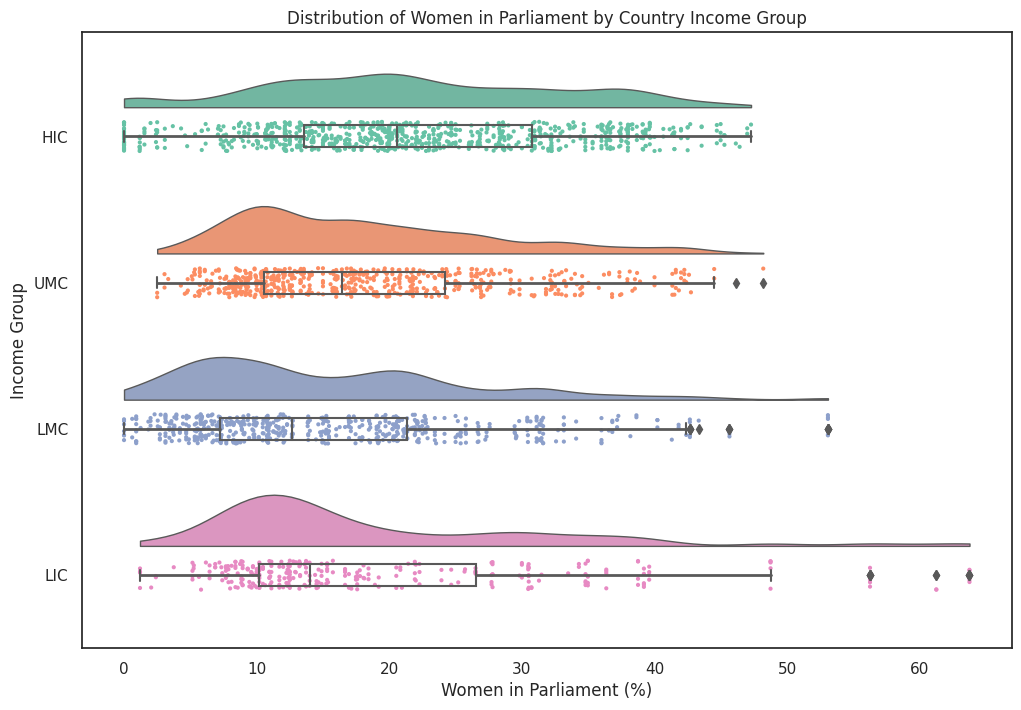

In [ ]:
plt.figure(figsize=(12, 8))
RainCloud(data=df_total, y='women_parl', x='Source', orient='h',palette="Set2", bw=.2)
plt.title('Distribution of Women in Parliament by Country Income Group')
plt.ylabel('Income Group')
plt.xlabel('Women in Parliament (%)')
plt.show()

High-Income Countries (HIC): The distribution of the percentage of women in parliament appears to have a lower spread, with a cluster of countries around the median value. There are a few outliers on the higher end.

Upper-Middle-Income Countries (UMC): There is a wider spread in the percentage of women in parliament, with a slightly lower median compared to HIC. The distribution is more skewed with several outliers both high and low.

Lower-Middle-Income Countries (LMC): The median percentage of women in parliament appears lower than in HIC and UMC, with the data spread fairly evenly across the range.

Low-Income Countries (LIC): The percentage of women in parliament is quite variable, with a number of outliers at both the low and high ends. The median is similar to LMC, but the distribution is more skewed towards lower percentages with a long tail of high values.

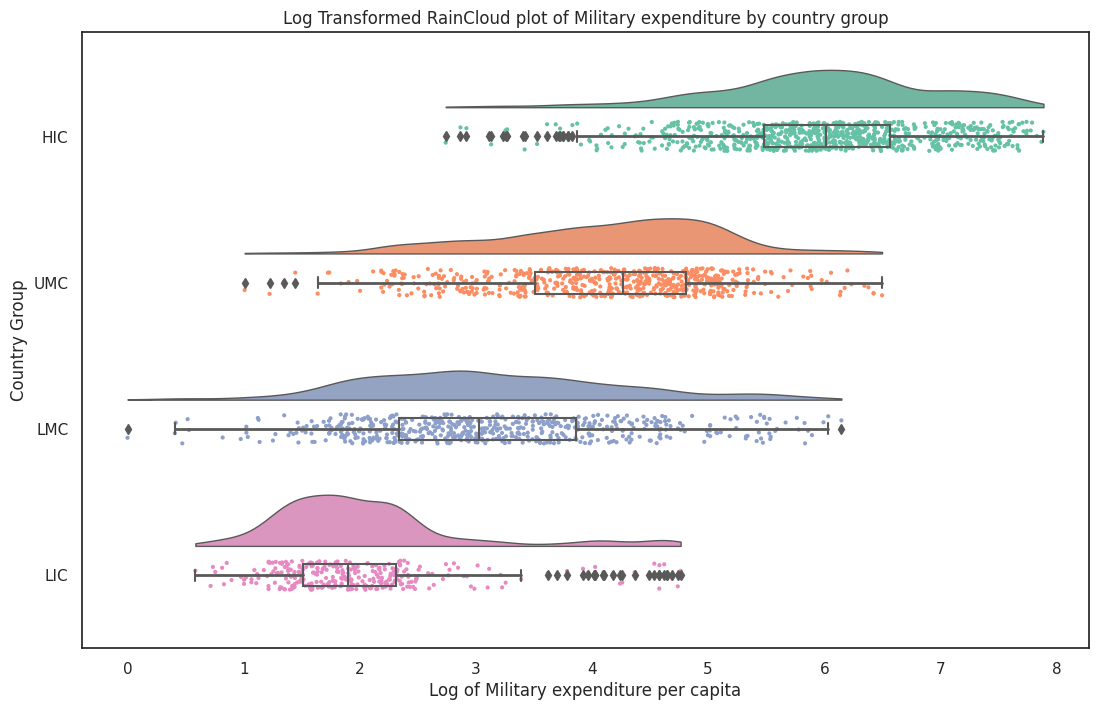

In [ ]:
#df_total['log_mil_exp_cap'] = np.log(df_total['mil_exp_cap'] + 1)

plt.figure(figsize=(13, 8))
RainCloud(data=df_total, x='Source', y='log_mil_exp_cap', orient='h', palette='Set2', bw=.2)
plt.title('Log Transformed RainCloud plot of Military expenditure by country group')
plt.ylabel('Country Group')
plt.xlabel('Log of Military expenditure per capita')
plt.show()

## Correlation Matrix

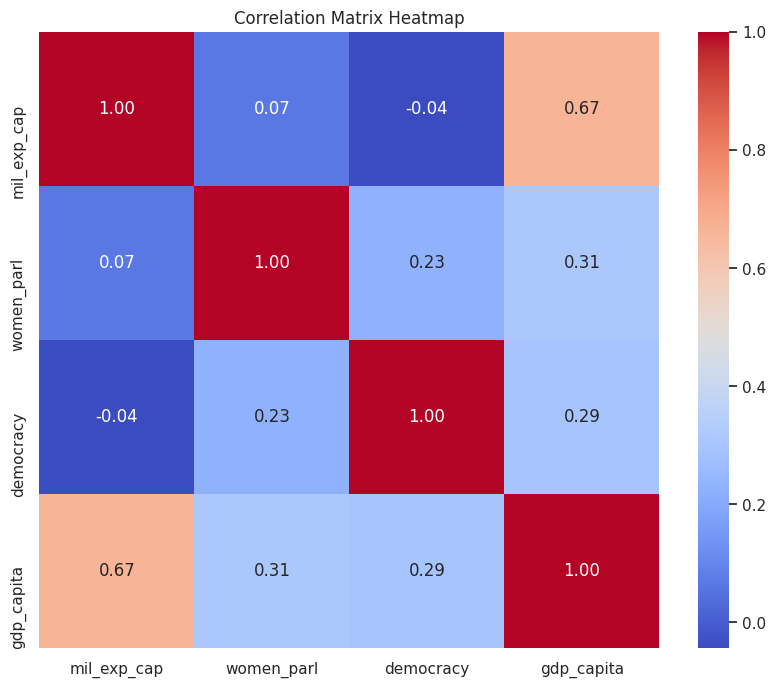

In [ ]:
selected_columns = df_total[['mil_exp_cap', 'women_parl', 'democracy', 'gdp_capita']]

correlation_matrix = selected_columns.corr()

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title
plt.title("Correlation Matrix Heatmap")

# Show the plot
plt.show()